## Assignment 4 - Learning
### CS550 Fall 2021

This assignment contains five problems. They are each worth 20 points.
We will not use a grading script for this assignment, but the grading criteria is explained in the instructions.
If you are having issues with inconsistent results, try setting seeds. If you find a seed that works for you, keep it in your code so we can see the results you expect us to see when we look at your code.

Student Name: Andrick Mercado
<br>If you used pair programming..
<br>Programming Partner:


### Problem 1
#### Linear Regression
The purpose of this exercise is to implement a simple linear regression from scratch.
Do not use a library to implement it.
You will generate synthetic data using the linear equation y = 50x + 22
The synthetic data will have some random variation to make the problem interesting. 
* Grading Criteria: The result of your regression should round to the orginal equation. It is not expected to be perfect.

### Part 1 - Generate Data
1. Randomly select 20 X values between 0 and 100. Use a uniform distribution.
2. Calculate Y values using 50x + 22 + RANDOM_VARIATION
        2.1 The random variation is because we don't want it to be perfect
        2.2 Use a normal distribution with values between -1 and 1 

In [1]:
'''MAKE SURE TO RUN FIRST'''
''' if you dont have a library uncomment this two lines and add the name of the library
#import pip
#pip.main(['install', 'tensorflow','--user'])
'''
import matplotlib.pyplot as plt
import numpy as np
from random import seed
from random import random
import csv
import pandas as pd

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

import keras
from sklearn import metrics
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn import neighbors

from mlxtend.plotting import plot_decision_regions
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [2]:
### Your code here

seed(1)
random_X = [random()*100+1 for i in range(0,20)]
random_variation = [random()*2-1 for i in range(0,20)]
Y_values = [50*random_X[i]+22+random_variation[i] for i in range(0,20)]

### Part 2 - Calculate Regression
Now that you have the data, calcualate the regression. Show your value for slope and intercept. Do not use an libraries to do it for you.
<BR>You have some random variance, so you probably won't get exactly y=50x+22 , but it should round to it.

In [3]:
### Your code here

mean_X = sum(random_X)/len(random_X)
mean_Y = sum (Y_values)/len(Y_values)

m = sum(( (random_X[i] - mean_X  )* (Y_values[i] - mean_Y) ) for i in range(0,20) )
m = m/sum( ( (random_X[i] - mean_X  )**2 ) for i in range(0,20))

b = mean_Y-m*mean_X

print("m: ", m , "b: ", b)

m:  50.00106684863311 b:  21.685202931756976


### Part 3 - Visualization
Create a visualization
* Include a scatter plot of the data points
* Include the real line for y = 50x +22 in blue
* Include the regression line in red (they may overlap, that is ok)

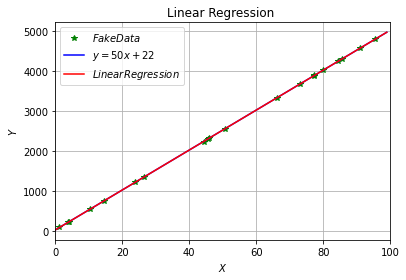

In [4]:
### Your code here

plt.plot(random_X, Y_values, "*", color = "green", label='$Fake Data$')
actual_Y = [50*i+22 for i in range(0,100)]
plt.plot(range(0,100), actual_Y, color = "blue", label='$y = 50x + 22$')
regression_Y = [m*x + b for x in range(0,100)]
plt.plot(range(0,100), regression_Y, color = "red", label='$Linear Regression$')
plt.grid('on')
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.title('Linear Regression ')
plt.xlim(0, 100)
#plt.ylim(0, 10000)
plt.legend()
plt.show()

### Part 4 - Create an outlier
Double the Y value for your 10s data point.
Run your regression function again and observe how the equation to the line changes.

m:  57.26919099708349 b:  -129.71471837406216


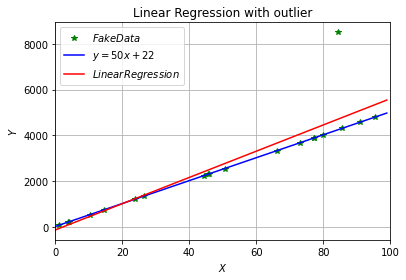

In [5]:
Y_values[10] = Y_values[10]*2

mean_X = sum(random_X)/len(random_X)
mean_Y = sum (Y_values)/len(Y_values)

m = sum(( (random_X[i] - mean_X  )* (Y_values[i] - mean_Y) ) for i in range(0,20) )
m = m/sum( ( (random_X[i] - mean_X  )**2 ) for i in range(0,20))

b = mean_Y-m*mean_X

print("m: ", m , "b: ", b)

plt.plot(random_X, Y_values, "*", color = "green", label='$Fake Data$')
actual_Y = [50*i+22 for i in range(0,100)]
plt.plot(range(0,100), actual_Y, color = "blue", label='$y = 50x + 22$')
regression_Y = [m*x + b for x in range(0,100)]
plt.plot(range(0,100), regression_Y, color = "red", label='$Linear Regression$')
plt.grid('on')
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.title('Linear Regression with outlier')
plt.xlim(0, 100)
#plt.ylim(0, 10000)
plt.legend()
plt.show()

Provide some explanation about what you saw and how to fix it. If it didn't affect anything, provide an explanation on why you think it didn't

**Explanation:** here we clearly see that the linear regression line shifted upwards, as a result of the outlier we made, in a real life scenererio we would try to figure out the reason for the outlier, such reasons can involve problems while adquiring the data, or its just a natural value in the data, but our case we dont know what the data represents so we could just remove it or keep it.

## Problem 2 - Decision Trees
* Pull the data from https://archive.ics.uci.edu/ml/datasets/Credit+Approval
* Create a decision tree to determine if credit should be extended based on a test case.
* Grading criteria: 
    * Demonstrate that you evaluated the data set and applied aduquate preprocessing to the data
    * Make sure you comment you code and the cleaning process so we can follow your logic in grading
    * Provide a confusion matrix for your results. Text based is fine.
    * Provide a visualization with explanation that demonstrates logical evaluation of the model
* Actual accuracy can depend on how you split the training and test data and other random variations
    * If you get below 70% accuracy, there may be a problem with your model
    

Accuracy:  0.9525267993874426

 Data corrolation between all columns except A16: 


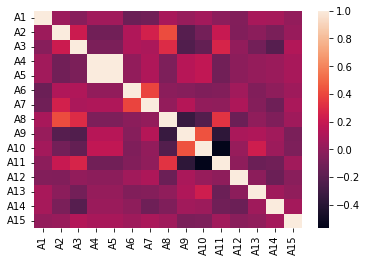

Confusion Matrix: 
 [[41 18]
 [13 59]]
              precision    recall  f1-score   support

           +       0.76      0.69      0.73        59
           -       0.77      0.82      0.79        72

    accuracy                           0.76       131
   macro avg       0.76      0.76      0.76       131
weighted avg       0.76      0.76      0.76       131



In [6]:
### You code here

# Get the data
data = pd.read_csv("crx.data")

# Preprocess the data
'''
    Cleaning is straight forward, we remove all missing values (delete the row) which are represented by "?"
    after we just make sure all columns types are correct, as well as make strings to ints,and if time permits we could try to add the deleted
    data back into training by using the same algorithm to calcuate missing values
'''
C = ["A1","A2","A3","A4","A5","A6","A7","A8","A9","A10","A11","A12","A13","A14","A15","A16"]
for col in C:#delte rows where we find empty cells
    data.drop(data.index[data[col] == '?'], inplace = True) 
    
data = data.apply(pd.to_numeric, errors='ignore')#make numbers that are strings to ints

#create dicts for converting the strings to ints
mapping_A1 = {'a': 0, 'b': 1}
mapping_A4 = {'u': 0, 'y': 1,'l': 2, 't': 3}
mapping_A5 = {'g': 0, 'p': 1, 'gg': 2}
mapping_A6 = {'c': 0, 'd': 1,'cc': 2, 'i': 3,'j': 4, 'k': 5,'m': 6, 'r': 7,'q': 8, 'w': 9,'x': 10, 'e': 11,'aa': 12, 'ff': 13}
mapping_A7 = {'v': 0, 'h': 1,'bb': 2, 'j': 3,'n': 4, 'z': 5,'dd': 6, 'ff': 7,'o': 8}
mapping_A9_A10_A12 = {'t': 0, 'f': 1}
mapping_A13 = {'g': 0, 'p': 1,'s': 2, 't': 3}
data = data.replace({'A1': mapping_A1, 'A4': mapping_A4, 'A5': mapping_A5, 'A6': mapping_A6, 'A7': mapping_A7,
              'A9': mapping_A9_A10_A12,'A10': mapping_A9_A10_A12,'A12': mapping_A9_A10_A12, 'A13': mapping_A13})
#print(data)

# Make the model
'''
    making the model we use sklearn train test split function, we make X hold all columns
    except the last one since its the class or y
'''
X = data.drop('A16', axis=1) #pick all column except class data which is A16 (+,-)
y = data[['A16']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train) 

# Test the model
'''
    here we just check how good x predicts y
'''
score = accuracy_score(clf.predict(X), y)#check how good x predicts y
print("Accuracy: ", score)

# Provide a visualization of the model
'''
    In order to pick the correct columns we can look at heatmap which gives us the corrolation of all columns
    lastly we print the confusion matrix
'''
print("\n Data corrolation between all columns except A16: ")
sns.heatmap(data.corr())#visualizer for corrolation betwen all columns
plt.show()#if time permits we can pick the data with most corrolation for now we pick all

y_pred = clf.predict(X_test)
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Put the explanation of your model here: For my model I just made sure my data was all numerical and that none of the cells were empty, and if they were I just removed themo from the final data, after cleaning all the data I just divided X and Y to be all the comuns except A16 which is the class column (+,-), and the Y to be the class column (+,-), from that we get the results above. As well as a strong corrolation can be seen in the heatmap between columsn A4 and A5


### Problem 3 - Artificial Neural Networks
* Use the MNIST dataset to classify the type of apparel using an artificial nueral network.
* https://www.kaggle.com/zalando-research/fashionmnist
* You may use the library of your choosing
* Grading criteria: Your results on the test data should exceed 0.80 accuracy and you have some explaination about the model.


In [7]:
### You code here

#extracting data
fashion_train=pd.read_csv("fashion-mnist_train.csv")
fashion_test=pd.read_csv("fashion-mnist_test.csv")

#we extract data based on their columns labels
X_train_fashion = fashion_train.drop('label',axis = 1)
y_train_fashion = fashion_train['label']
X_test_fashion = fashion_test.drop('label',axis = 1)
y_test_fashion = fashion_test['label']

#convert data to matrix form and float32
y_train_fashion = to_categorical(y_train_fashion, num_classes=10)
y_test_fashion = to_categorical(y_test_fashion, num_classes=10)


neural_network = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(10,activation='softmax'),
])

#we must compile 
neural_network.compile(loss="categorical_crossentropy", metrics = ['accuracy'])

#fit
neural_network.fit(X_train_fashion, y_train_fashion, verbose=0,batch_size=100, epochs=30)

#accuracy
test_loss_fashion, test_acc_fashion = neural_network.evaluate(X_test_fashion, y_test_fashion)

313/313 [==============================] - 0s 803us/step - loss: 0.3690 - accuracy: 0.8767


Provide an explanation on how you picked the initial parameters: After reformating the data I tested different parameters to see which resulted in the least amount of errors or incorrect guesses, here I made use of dropout and dense libraries for optimizing the ann with activations as shown above.


### Problem 4 - K-means 
* Use the Ecoli dataset at https://archive.ics.uci.edu/ml/datasets/Ecoli
* Ignore the label and create clusters using k values between 4 and 6.
* Pick the best k value and explain why you picked it
* Show any calculations you used to pick the best cluster
* Create two visualization
    * One colors the nodes with the cluster membership
    * The other colors the nodes based on the actual label
* Grading criteria: Aduately describe how to pick the best cluster and successful create the required visualizations

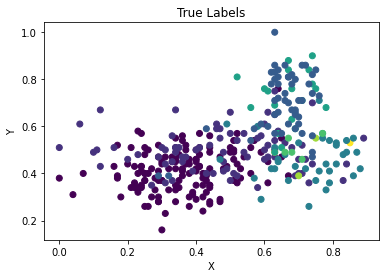

C:\Users\Andrick\AppData\Roaming\Python\Python38\site-packages\mlxtend\plotting\decision_regions.py:274: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=x_data,


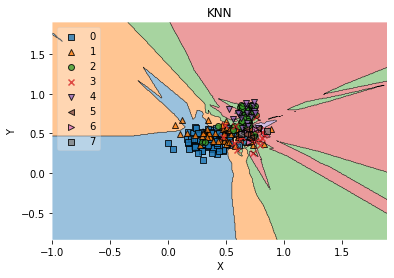

In [8]:
### Your code here

def split_input_data(data):
    data.columns =['Name', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7','Class']
    mapping_Class = {'cp': 0, 'im': 1,'pp': 2, 'imU': 3,'om':4, 'omL': 5, 'imL': 6, 'imS':7}
    data = data.replace({'Class': mapping_Class})
    data = data.apply(pd.to_numeric, errors='ignore')#make numbers that are strings to ints
    input_data = data
    
    x1 = data['A1'].array
    x2 = data['A2'].array
    x3 = data['A3'].array
    x4 = data['A4'].array
    x5 = data['A5'].array
    x6 = data['A6'].array
    x7 = data['A7'].array
    #, x_2,y_2,x_3,y_3,x_4
    #,x3,x4,x5,x6,x7
    x = [[x_1, y_1] for x_1, y_1 in zip(x1, x2)]
    y = data['Class'].array

    X_train, X_test, y_train, y_test = train_test_split(x, y)
    plt.scatter(x1,x2, c=y)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('True Labels')
    plt.show()
    return X_train, X_test, y_train, y_test


def display_contours(classifier, number_of_neighbors, x, y):
    plot_decision_regions(np.asarray(x), np.asarray(y), clf=classifier, legend=2)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('KNN')
    plt.show()


def knn(nneighbors, X_train, y_train, X_test,data):
    clf = neighbors.KNeighborsRegressor(nneighbors)
    clf.fit(X_train, y_train)
    predicted_y = clf.predict(X_test)
    display_contours(clf, nneighbors, X_train, y_train)
    
    return predicted_y


def evaluateknn(y_predicted, y_test):
    df = pd.DataFrame(y_predicted)
    products_list = df.values.reshape(-1,).tolist()
    products_list = [int(x) for x in products_list]

    df = pd.DataFrame(y_test)
    products_list2 = df.values.reshape(-1,).tolist()
    products_list2 = [int(x) for x in products_list2]

    print("Classification report: ")
    print(classification_report(products_list2, products_list))



input_data = pd.read_csv("ecoli.data",delim_whitespace=True)
X_train, X_test, y_train, y_test = split_input_data(input_data)

predicted_y = knn(6, X_train, y_train, X_test,input_data)
#evaluateknn(predicted_y, y_test)

Provide an explanation of your model: Here I only took two collumns for features and the 8 classes are still kept the same, we can see that the current classifier has a hard time determing all classes as a result of their low amount of intances, here I set the knn to 6 and as a result we get the graph above, I chose this knn value by chaning them and seing which chose the least amount of wrong classifiers.


### Problem 5 - Support Vector Machines
* Use the Iris trainging set
* Use some method to reduce the dimensionality to two dimensions
    * We are mostly doing this so we can visualize the results
* Split the data set into 80% training and 20% testing
* Create an SVM to model the data
* Create a visualization that shows the line and the margins
* Creat anonther visualization that show the decision surface
    * Do not include the test data points
    * Randomly select 10 test points and add them to the visualization. Color them based on their label
    * Are the random test points consistently on the correct side of the line?
* Predict the label for ALL of the test data 
    * Show a confusion matrix
    * Calculate the F1 measure
* Grading criteria: 
    * SVM graphically appears to correctly to use a reasonable line
    * F1 measure is consistent with what we showed in class

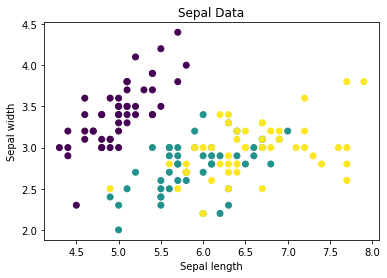

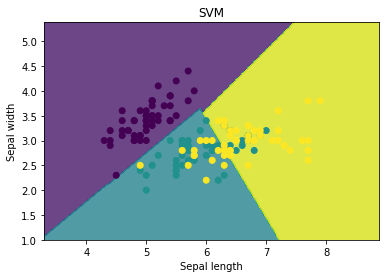

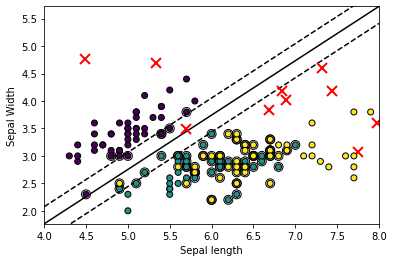

[[10  0  0]
 [ 0 10  2]
 [ 0  1  7]]
Accuracy: 0.9


In [9]:
### You code here

def sepal_data(X,y):
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('Sepal Data')
    plt.show()
    
def SVM_model(X,y):
    clf = svm.SVC(kernel='linear', C=1).fit(X, y)

    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                                np.arange(y_min, y_max, 0.02))
 
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title('SVM')
 
    plt.show()
    
    f = plt.figure()
    f.set_figwidth(6)
    f.set_figheight(4)
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(4, 8)
    yy = a * xx - (clf.intercept_[0]) / w[1]
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin
    plt.figure(1, figsize=(4, 3))
    plt.clf()
    plt.plot(xx, yy, "k-")
    plt.plot(xx, yy_down, "k--")
    plt.plot(xx, yy_up, "k--")
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
     facecolors="none", zorder=10, edgecolors="k")
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10,
     edgecolors="k")
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal Width")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    #plot random points
    x_i =  [random()*4+4 for i in range(0,10)]
    y_i =  [random()*2+3 for i in range(0,10)]
    plt.plot(x_i,y_i, 'x', color='red', markeredgewidth=2, markersize=10)
    plt.show()

def test_results(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    classifier = SVC(kernel = 'linear')
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    
iris = datasets.load_iris()
X = iris.data[:, :2]  
y = iris.target    

sepal_data(X, y)
SVM_model(X,y)
test_results(X,y)


Explanation of your model: First I wanted to vizualize the data, which is the first graph above, once I had an idea, after I made graphs for both support vectors and svm kernel, I implemented 10 'X' which correspond to random values which as seen by the graph we can see their classification based on the support vectors, lastly we output the confusion matrix and a f1 score
